Weight initialization using:
- Xavier Uniform Initialization 
- Uniform Initialization
- Pytorch Default Initialization

on MNIST dataset with tanh activation

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [ ]:
# xavier uniform init

class Net_Xavier(nn.Module):
    def __init__(self, Layers):
        super().__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1: # apply tanh if not the last layer
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        
        return x

In [ ]:
# uniform init

class Net_Uniform(nn.Module):
    def __init__(self, Layers):
        super().__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1: # apply tanh if not the last layer
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        
        return x

In [ ]:
# pytorch default init

class Net(nn.Module):
    def __init__(self, Layers):
        super().__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1: # apply tanh if not the last layer
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        
        return x

In [5]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    loss_accuracy = {"training_loss": [], "validation_accuracy": []}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy["training_loss"].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        
        accuracy = 100 * (correct/len(validation_dataset))
        loss_accuracy["validation_accuracy"].append(accuracy)

    return loss_accuracy

In [6]:
train_dataset = dsets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [8]:
criterion = nn.CrossEntropyLoss()
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15

In [9]:
# using pytorch default initialization

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs)

In [10]:
# using xavier uniform initialization

model_xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_xavier.parameters(), lr=learning_rate)
training_results_xavier = train(model_xavier, criterion, train_loader, validation_loader, optimizer, epochs)

In [17]:
model_xavier

Net_Xavier(
  (hidden): ModuleList(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=100, bias=True)
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [11]:
# using uniform initialization

model_uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_uniform.parameters(), lr=learning_rate)
training_results_uniform = train(model_uniform, criterion, train_loader, validation_loader, optimizer, epochs)

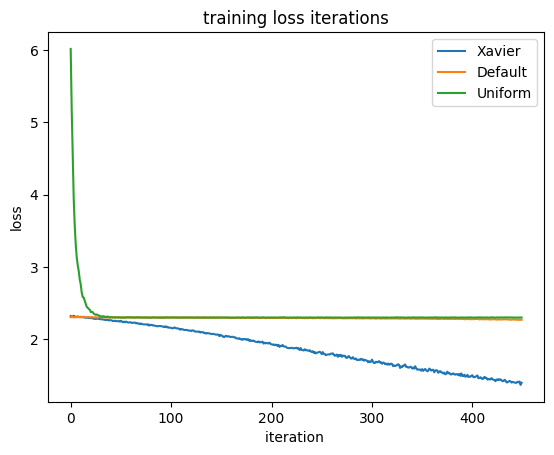

In [12]:
# Plot the loss

plt.plot(training_results_xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')  
plt.title('training loss iterations')
plt.legend()

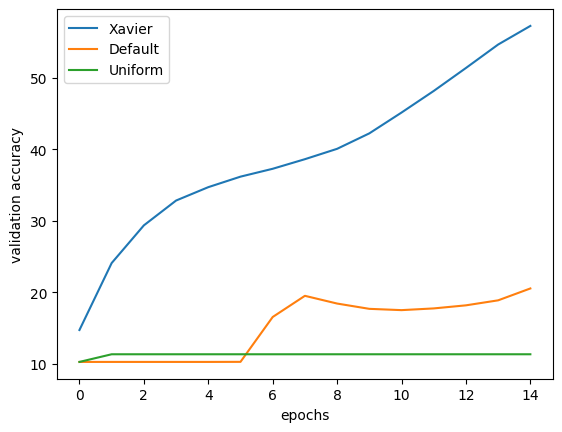

In [13]:
# Plot the accuracy

plt.plot(training_results_xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_uniform['validation_accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs')   
plt.legend()